In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd


In [2]:
# 2. find url and store it in a variable
url = "https://www.popvortex.com/music/charts/top-100-songs.php"

In [3]:
response = requests.get(url)


In [4]:
response.status_code # 200 status code means OK!

200

In [5]:
soup = BeautifulSoup(response.content, "html.parser")

In [6]:
##soup.select("#chart-position-1 > div.chart-content.col-xs-12.col-sm-8 > p")
soup.select("#chart-position-1 > div.chart-content.col-xs-12.col-sm-8 > p > cite")
#chart-position-1 > div.chart-content.col-xs-12.col-sm-8 > p
#chart-position-1 > div.chart-content.col-xs-12.col-sm-8 > p > cite
## scrapping of one artist 

[<cite class="title">Fast Car</cite>]

In [7]:
soup.select("div.chart-content.col-xs-12.col-sm-8 > p ")

## scraping of the whole list 

[<p class="title-artist"><cite class="title">Fast Car</cite><em class="artist">Luke Combs</em></p>,
 <p class="title-artist"><cite class="title">Last Night</cite><em class="artist">Morgan Wallen</em></p>,
 <p class="title-artist"><cite class="title">Flowers</cite><em class="artist">Miley Cyrus</em></p>,
 <p class="title-artist"><cite class="title">Like Crazy (Deep House Remix)</cite><em class="artist">Jimin</em></p>,
 <p class="title-artist"><cite class="title">Calm Down</cite><em class="artist">Rema &amp; Selena Gomez</em></p>,
 <p class="title-artist"><cite class="title">Like Crazy (UK Garage Remix)</cite><em class="artist">Jimin</em></p>,
 <p class="title-artist"><cite class="title">Anti-Hero</cite><em class="artist">Taylor Swift</em></p>,
 <p class="title-artist"><cite class="title">Eyes Closed</cite><em class="artist">Ed Sheeran</em></p>,
 <p class="title-artist"><cite class="title">Heart Like A Truck</cite><em class="artist">Lainey Wilson</em></p>,
 <p class="title-artist"><cite 

In [8]:
titleartist=soup.select("div.chart-content.col-xs-12.col-sm-8 > p > cite")
title = soup.select("div.chart-content.col-xs-12.col-sm-8 > p > em")

print(titleartist)
print(title)

## made two lists that contain names and titles 

[<cite class="title">Fast Car</cite>, <cite class="title">Last Night</cite>, <cite class="title">Flowers</cite>, <cite class="title">Like Crazy (Deep House Remix)</cite>, <cite class="title">Calm Down</cite>, <cite class="title">Like Crazy (UK Garage Remix)</cite>, <cite class="title">Anti-Hero</cite>, <cite class="title">Eyes Closed</cite>, <cite class="title">Heart Like A Truck</cite>, <cite class="title">Like Crazy (Instrumental)</cite>, <cite class="title">You Say</cite>, <cite class="title">Thinkin’ Bout Me</cite>, <cite class="title">Players</cite>, <cite class="title">Fighting Myself</cite>, <cite class="title">Thank God</cite>, <cite class="title">Thought You Should Know</cite>, <cite class="title">labour</cite>, <cite class="title">Thank God I Do</cite>, <cite class="title">Like Crazy</cite>, <cite class="title">Like Crazy (English Version)</cite>, <cite class="title">TRUSTFALL</cite>, <cite class="title">Growin' Up and Gettin' Old</cite>, <cite class="title">Justice for All</

In [9]:
#initialize empty lists
title = []
artist = []


# define the number of iterations of our for loop
# by checking how many elements are in the retrieved result set
# (this is equivalent but more robust than just explicitly defining 250 iterations)
num_iter = len(soup.select("div.chart-content.col-xs-12.col-sm-8 > p > cite"))

tClist = soup.select("div.chart-content.col-xs-12.col-sm-8 > p > cite")
spanlist = soup.select("div.chart-content.col-xs-12.col-sm-8 > p > em")
# iterate through the result set and retrive all the data
for i in range(num_iter):
    title.append(tClist[i].get_text())
    artist.append(spanlist[i].get_text())

print(title)
print(artist)
## the lengths are not equal as one is 121 and the other is a bit lower 

['Fast Car', 'Last Night', 'Flowers', 'Like Crazy (Deep House Remix)', 'Calm Down', 'Like Crazy (UK Garage Remix)', 'Anti-Hero', 'Eyes Closed', 'Heart Like A Truck', 'Like Crazy (Instrumental)', 'You Say', 'Thinkin’ Bout Me', 'Players', 'Fighting Myself', 'Thank God', 'Thought You Should Know', 'labour', 'Thank God I Do', 'Like Crazy', 'Like Crazy (English Version)', 'TRUSTFALL', "Growin' Up and Gettin' Old", 'Justice for All', "God's Country", 'Love You Anyway', '5 Leaf Clover', 'Rock and a Hard Place', 'Favorite Song', 'wait in the truck', 'Rescue', 'Wasted On You', 'Unstoppable', 'Kill Bill', 'All Of The Girls You Loved Before', "I Ain't Worried", 'Here Without You', 'NEED A FAVOR', 'This Is Our God', 'Sure Thing', "Something in the Orange (Z&E's Version)", 'In Jesus Name (God Of Possible)', 'You Proof', 'As It Was', 'Made You Look', 'More Than Able (feat. Chandler Moore & Tiffany Hudson)', "Chasin' You", 'Eyes Closed', "Sounds Like Something I'd Do", 'Tennessee Whiskey', 'Hold My H

In [10]:
songs = pd.DataFrame({ "artist_name":artist,
                        "title":title
                      })

##DF of hot 100 

In [11]:
test=songs.sample(n = 1)
name= test["artist_name"].to_string(index=False, header=False) 
nametitle= " " + "-" + " " + test["title"].to_string(index=False, header=False) 

name + nametitle

'BTS - War of Hormone'

In [12]:
    hotcandidate = input("Please enter a song and we will check if its hot:")
    
    x=0
    for i in songs["title"]:
            if i==hotcandidate:
                test = songs[songs['title'] != hotcandidate]
                test=songs.sample(n = 1)
                test= name + nametitle
                answer="Damn thats hot!!! You might like this song: \n" + test
                x=0
                break
            else:
                x+=1

    if x>0:
        answer="please try again"
        
    
    print(answer)
    
###works without a call function and return 

Please enter a song and we will check if its hot:Flowers
Damn thats hot!!! You might like this song: 
BTS - War of Hormone


In [21]:

def hotsong(hotcandidate):
    
    x=0
        
    for i in songs["title"]:
            if i==hotcandidate:
                test = songs[songs['title'] != hotcandidate]
                test=songs.sample(n = 1)
                test= name + nametitle
                answer="Damn thats hot!!! You might like this song:  \n " + test
                x=0
                break
            else:
                x+=1

    if x>0:
        answer="please try again"


    return print(answer) 

In [22]:
answer

'Damn thats hot!!! You might like this song: \nBTS - War of Hormone'

In [23]:
hotcandidate = input("Please enter a song and we will check if its hot:")

hotsong(hotcandidate)


## this function is not working yet the idea is to run it on our  songs DF and to ask the user for his song

## please see the above  version that works without a function 


Please enter a song and we will check if its hot:Flowers
Damn thats hot!!! You might like this song:  
 BTS - War of Hormone


In [29]:
# K-means
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D


n_samples = 1500
X, _ = datasets.make_blobs(n_samples=playlist, centers=3, cluster_std=0.7, n_features=2, random_state=0)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5,)
plt.show()

NameError: name 'playlist' is not defined

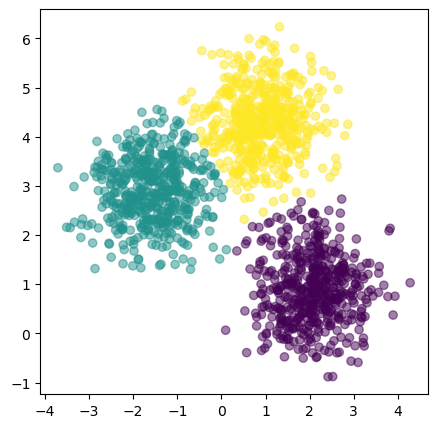

Wall time: 829 ms


In [26]:
%%time
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(X)
pred = kmeans.predict(X)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=pred,alpha=0.5)
plt.show()

In [27]:
pred[0:20]

array([1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 0, 1, 1])

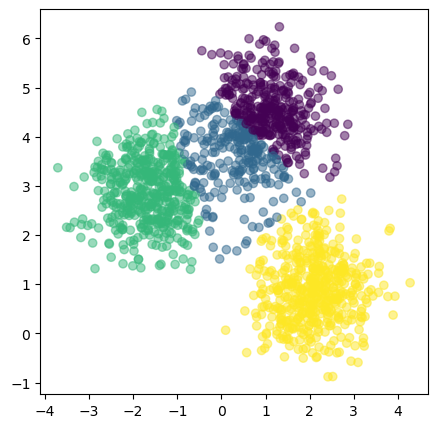

In [28]:
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(X)
pred = kmeans.predict(X)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=pred,alpha=0.5)
plt.show()